In [30]:
import os
import nibabel as nib

# Function to convert NIfTI to PGM P2 format
def nii_to_pgm_p2(nii_file_path, output_folder):
    # Load the NIfTI file
    nii_img = nib.load(nii_file_path)

    # Get the image data array
    nii_data = nii_img.get_fdata()

    # Ensure 3D data is squeezed to 2D slice
    if len(nii_data.shape) == 3:
        slice_index = nii_data.shape[2] // 2  # Choose the middle slice
        nii_data = nii_data[:, :, slice_index]

    # Normalize pixel values to range 0-255
    min_val = nii_data.min()
    max_val = nii_data.max()
    nii_data = ((nii_data - min_val) / (max_val - min_val) * 255).astype(int)

    # Extract file name without extension
    file_name = os.path.splitext(os.path.basename(nii_file_path))[0]

    # Output file path
    pgm_file_path = os.path.join(output_folder, f"{file_name}.pgm")

    # Write PGM P2 header
    with open(pgm_file_path, 'w') as f:
        f.write("P2\n")  # Magic number for PGM P2 format
        f.write(f"{nii_data.shape[1]} {nii_data.shape[0]}\n")  # Width and height
        f.write("255\n")  # Maximum pixel value

        # Write pixel values
        for row in nii_data:
            for pixel in row:
                f.write(f"{pixel} ")
            f.write("\n")

    print(f"PGM P2 file saved at: {pgm_file_path}")



# Folder containing NIfTI files
nifti_folder = 'E:\\priti\\training_masks'

# Output folder for PGM files
output_folder = 'E:\\priti\\training_masks_pgm'

# Iterate through each NIfTI file in the folder
for file_name in os.listdir(nifti_folder):
    if file_name.endswith('.nii') or file_name.endswith('.nii.gz'):
        nii_file_path = os.path.join(nifti_folder, file_name)
        nii_to_pgm_p2(nii_file_path, output_folder)




PGM P2 file saved at: E:\priti\training_masks_pgm\BraTS20_Training_001_seg.nii.pgm
PGM P2 file saved at: E:\priti\training_masks_pgm\BraTS20_Training_002_seg.nii.pgm
PGM P2 file saved at: E:\priti\training_masks_pgm\BraTS20_Training_003_seg.nii.pgm
PGM P2 file saved at: E:\priti\training_masks_pgm\BraTS20_Training_004_seg.nii.pgm


C:\Users\Shruti Pathak\AppData\Local\Temp\ipykernel_12540\1492286158.py:20: RuntimeWarning: invalid value encountered in divide
  nii_data = ((nii_data - min_val) / (max_val - min_val) * 255).astype(int)
C:\Users\Shruti Pathak\AppData\Local\Temp\ipykernel_12540\1492286158.py:20: RuntimeWarning: invalid value encountered in cast
  nii_data = ((nii_data - min_val) / (max_val - min_val) * 255).astype(int)


PGM P2 file saved at: E:\priti\training_masks_pgm\BraTS20_Training_005_seg.nii.pgm
PGM P2 file saved at: E:\priti\training_masks_pgm\BraTS20_Training_006_seg.nii.pgm
PGM P2 file saved at: E:\priti\training_masks_pgm\BraTS20_Training_007_seg.nii.pgm
PGM P2 file saved at: E:\priti\training_masks_pgm\BraTS20_Training_008_seg.nii.pgm
PGM P2 file saved at: E:\priti\training_masks_pgm\BraTS20_Training_009_seg.nii.pgm
PGM P2 file saved at: E:\priti\training_masks_pgm\BraTS20_Training_010_seg.nii.pgm
PGM P2 file saved at: E:\priti\training_masks_pgm\BraTS20_Training_011_seg.nii.pgm
PGM P2 file saved at: E:\priti\training_masks_pgm\BraTS20_Training_012_seg.nii.pgm
PGM P2 file saved at: E:\priti\training_masks_pgm\BraTS20_Training_013_seg.nii.pgm
PGM P2 file saved at: E:\priti\training_masks_pgm\BraTS20_Training_014_seg.nii.pgm
PGM P2 file saved at: E:\priti\training_masks_pgm\BraTS20_Training_015_seg.nii.pgm
PGM P2 file saved at: E:\priti\training_masks_pgm\BraTS20_Training_016_seg.nii.pgm
PGM 

In [13]:
import os

def read_pgm(filename):
    """
    Reads a PGM file and returns the image data as a 2D list.
    """
    with open(filename, 'rb') as f:
        # Skip comments
        magic_number = f.readline().strip()
        if magic_number != b'P2':
            raise ValueError("Not a PGM file")
        while True:
            line = f.readline().decode('utf-8').strip()
            if not line.startswith('#'):
                break

        # Read the header
        width, height = map(int, line.split())
        max_val = int(f.readline())

        # Read the image data
        pixel_values = []
        for _ in range(height):
            row = map(int, f.readline().split())
            pixel_values.extend(row)

        return pixel_values

def read_pgm_files_from_folder(folder_path):
    """
    Reads all PGM files from a folder and returns their data as a list of pixel value lists.
    """
    pgm_files_pixel_values = []
    for i, filename in enumerate(os.listdir(folder_path)):
        if filename.endswith('.pgm'):
            file_path = os.path.join(folder_path, filename)
            pixel_values = read_pgm(file_path)
            pgm_files_pixel_values.append(pixel_values)
    return pgm_files_pixel_values

# Example usage:
folder_path = 'E:\\priti\\training_pgm'
pgm_files_pixel_values = read_pgm_files_from_folder(folder_path)

# Access pixel values using different lists
for i, pixel_values in enumerate(pgm_files_pixel_values):
    locals()[f"pixel_values_{i}"] = pixel_values

# Access pixel values using dynamically created variable names
for i, pixel_values in enumerate(pgm_files_pixel_values):
    print(f"Pixel values from file {i}: {locals()[f'pixel_values_{i}']}")


Pixel values from file 0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [17]:
# Example usage:
folder_path = 'E:\\priti\\training_masks_Pgm'
pgm_files_pixel_values = read_pgm_files_from_folder(folder_path)

# Access pixel values using different lists
for i, pixel_values in enumerate(pgm_files_pixel_values):
    locals()[f"pixel_values_{i}_mask"] = pixel_values

# Access pixel values using dynamically created variable names
for i, pixel_values in enumerate(pgm_files_pixel_values):
    print(f"Pixel values from file {i}: {locals()[f'pixel_values_{i}_mask']}")

Pixel values from file 0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

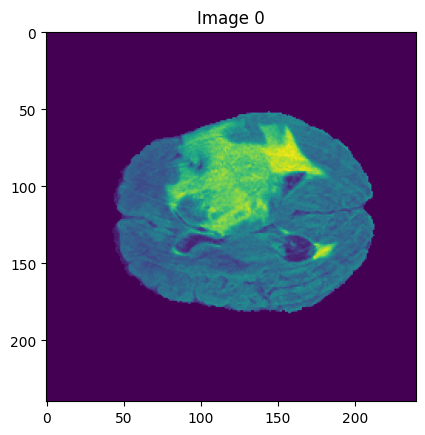

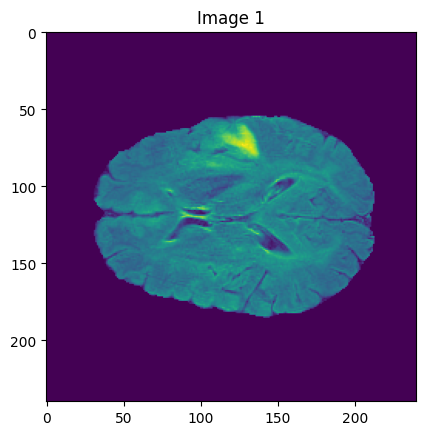

In [19]:
import matplotlib.pyplot as plt

height = 240
width = 240

def convert_to_2d_list(lst, rows, cols):
    if len(lst) != rows * cols:
        raise ValueError("Length of the 1D list does not match the specified dimensions of the 2D list.")
    return [lst[i*cols:(i+1)*cols] for i in range(rows)]

# Assuming you have pixel_values_0, pixel_values_1, ..., pixel_values_4 lists already defined

for i in range(2):
    pixel_values = locals()[f'pixel_values_{i}']
    img = convert_to_2d_list(pixel_values, height, width)
    plt.imshow(img)
    plt.title(f'Image {i}')
    plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel='linear', nu=0.1)  # You can adjust the parameter 'nu'

for t in range(20):
    X_train = []
    k = 0
    for i in range(width):
        for j in range(height):
            rows = []
            rows.append(locals()[f'pixel_values_{t}'][k])
            X_train.append(rows)
            k += 1
            
    # y_train will be a list of ones (since it's a single-class classification)
    y_train = [1] * len(X_train)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Fit the model to the training data
    model.fit(X_train_scaled)

# After training, you can use the model for prediction or anomaly detection


In [25]:
test='E:\\priti\\val_pgm\\BraTS20_Training_021_flair.nii.pgm'
test_mask='E:\\priti\\val_masks_pgm\\BraTS20_Training_021_seg.nii.pgm'

pixel_values_val = read_pgm(test)
pixel_values_val_mask = read_pgm(test_mask)

In [26]:
X_test=[]

k=0
for i in range(width):
    for j in range(height):
        rows=[]
        rows.append(pixel_values_val[k])
        X_test.append(rows)
        k+=1
        
        
y_test=[]
k=0
for i in range(width):
    for j in range(height):
        y_test.append(pixel_values_val_mask[k])
        k+=1
        
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled)
print(y_test)

[[-0.60360611]
 [-0.60360611]
 [-0.60360611]
 ...
 [-0.60360611]
 [-0.60360611]
 [-0.60360611]]
[-2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -2147483648, -21474

In [27]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0


In [28]:
print(y_pred)

[-1 -1 -1 ... -1 -1 -1]
